In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tesla = pd.read_csv('tesla_processed_datset.csv')

In [3]:
tesla.head()

,Unnamed: 0,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,All Sources,Accident Category
0,0,296,2022,2023-01-30,USA,MO,speeding tesla crashes into car,1.0,No,Unknown,1,-,-,-,No,-,-,https://web.archive.org/web/20230130231416/ht...,https://web.archive.org/web/20230130231416/ht...,Collision
1,1,295,2022,2023-01-21,USA,CA,tesla crashses into resident's pool,1.0,Yes,Unknown,-,-,1,-,No,-,-,https://archive.is/r4ida,https://archive.is/r4ida,Collision
2,2,294,2022,2023-01-17,USA,CA,tesla crashes into back of semi,1.0,Yes,Unknown,-,-,1,-,No,-,-,https://web.archive.org/web/20230118162813/ht...,https://web.archive.org/web/20230118162813/ht...,Collision
3,3,293,2022,2023-01-07,Canada,Unknown,tesla crashes,1.0,Yes,Unknown,-,-,1,-,No,-,-,https://web.archive.org/web/20230109041434/ht...,https://web.archive.org/web/20230109041434/ht...,Collision
4,4,292,2022,2023-01-07,USA,WA,"tesla hits pole, catches on fire",1.0,No,1,-,-,1,-,No,-,-,https://web.archive.org/web/20230107232745/ht...,nan| https://web.archive.org/web/2023010723274...,Fire-related


In [4]:
backup_tesla = tesla.copy()

In [6]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 20 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Unnamed: 0                                                          309 non-null    int64  
 1   Case #                                                              309 non-null    int64  
 2   Year                                                                309 non-null    int64  
 3   Date                                                                296 non-null    object 
 4   Country                                                             296 non-null    object 
 5   State                                                               309 non-null    object 
 6   Description                                                         309 non-null    object 
 7   Deaths           

In [7]:
tesla.drop(columns = 'Unnamed: 0')

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,All Sources,Accident Category
0,296,2022,2023-01-30,USA,MO,speeding tesla crashes into car,1.0,No,Unknown,1,-,-,-,No,-,-,https://web.archive.org/web/20230130231416/ht...,https://web.archive.org/web/20230130231416/ht...,Collision
1,295,2022,2023-01-21,USA,CA,tesla crashses into resident's pool,1.0,Yes,Unknown,-,-,1,-,No,-,-,https://archive.is/r4ida,https://archive.is/r4ida,Collision
2,294,2022,2023-01-17,USA,CA,tesla crashes into back of semi,1.0,Yes,Unknown,-,-,1,-,No,-,-,https://web.archive.org/web/20230118162813/ht...,https://web.archive.org/web/20230118162813/ht...,Collision
3,293,2022,2023-01-07,Canada,Unknown,tesla crashes,1.0,Yes,Unknown,-,-,1,-,No,-,-,https://web.archive.org/web/20230109041434/ht...,https://web.archive.org/web/20230109041434/ht...,Collision
4,292,2022,2023-01-07,USA,WA,"tesla hits pole, catches on fire",1.0,No,1,-,-,1,-,No,-,-,https://web.archive.org/web/20230107232745/ht...,nan| https://web.archive.org/web/2023010723274...,Fire-related
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,0,NaN,NaN,Unknown,no description available,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Other
305,0,0,NaN,NaN,Unknown,no description available,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Other
306,0,0,NaN,NaN,Unknown,no description available,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Other
307,0,0,NaN,NaN,Unknown,no description available,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Other


In [9]:
tesla['All Sources'].fillna('Unknown')

0       https://web.archive.org/web/20230130231416/ht...
1                              https://archive.is/r4ida 
2       https://web.archive.org/web/20230118162813/ht...
3       https://web.archive.org/web/20230109041434/ht...
4      nan| https://web.archive.org/web/2023010723274...
                             ...                        
304                                              Unknown
305                                              Unknown
306                                              Unknown
307                                              Unknown
308                                              Unknown
Name: All Sources, Length: 309, dtype: object

In [10]:
sudden_accln = pd.read_csv('Tesla Deaths - Sudden Acceleration.csv')

In [11]:
sudden_accln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VIN              119 non-null    object
 1   Model            122 non-null    object
 2   Report Date      122 non-null    object
 3   Incident Date    122 non-null    object
 4   Location         122 non-null    object
 5   NHTSA Complaint  122 non-null    int64 
 6   Details          122 non-null    object
dtypes: int64(1), object(6)
memory usage: 6.8+ KB


In [14]:
sudden_accln.head()

,VIN,Model,Report Date,Incident Date,Location,NHTSA Complaint,Details
0,5YJSA1DN0DF****,2013 MODEL S,12-November-19,22-January-15,"LOS GATOS, CA",11279662,TL THE CONTACT OWNED A 2013 TESLA MODEL S. WHI...
1,5YJXCDE24KF****,2019 MODEL X,6-October-19,2-October-19,"BAKERSFIELD, CA",11266551,WHILE I WAS PARKING SUDDEN UNINTENDED ACCELERA...
2,5YJ3E1EA4KF****,2019 MODEL 3,8-October-19,29-September-19,"WEXFORD, PA",11267131,MY WIFE WAS TRYING TO PARK THE CAR IN OUR GARA...
3,5YJ3E1EA2JF****,2018 MODEL 3,14-October-19,24-September-19,"FREMONT, CA",11268280,HELLO- I WAS TRYING TO PARK MY VEHICLE IN A PA...
4,5YJSA1E28KF****,2019 MODEL S,21-October-19,18-October-19,"GERMANTOWN, TN",11269912,TL THE CONTACT OWNS A 2019 TESLA MODEL S. WHIL...


In [15]:
sudden_accln['VIN'].fillna('Unknown')

0      5YJSA1DN0DF****
1      5YJXCDE24KF****
2      5YJ3E1EA4KF****
3      5YJ3E1EA2JF****
4      5YJSA1E28KF****
            ...       
117            Unknown
118    5YJSA1CN0DF****
119    5YJSA1DN5DF****
120    5YJSA1CN9DF****
121    5YJSA1CN1DF****
Name: VIN, Length: 122, dtype: object

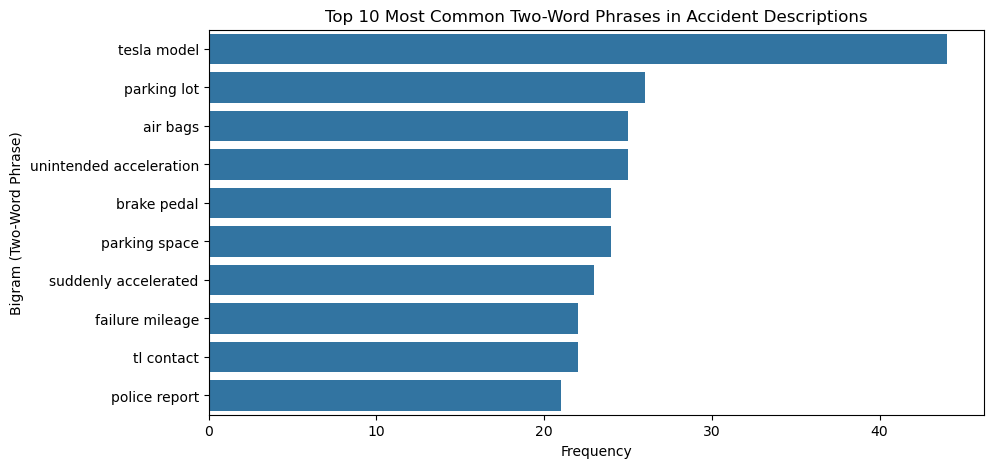

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Convert descriptions to lowercase
sudden_accln["Details"] = sudden_accln["Details"].astype(str).str.lower()

# Use CountVectorizer to find most common bigrams (two-word phrases)
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vectorizer.fit_transform(sudden_accln["Details"])

# Get bigram frequencies
bigrams = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
bigram_counts = bigrams.sum().sort_values(ascending=False).head(10)

# Plot the top bigrams
plt.figure(figsize=(10, 5))
sns.barplot(x=bigram_counts.values, y=bigram_counts.index)
plt.title("Top 10 Most Common Two-Word Phrases in Accident Descriptions")
plt.xlabel("Frequency")
plt.ylabel("Bigram (Two-Word Phrase)")
plt.show()

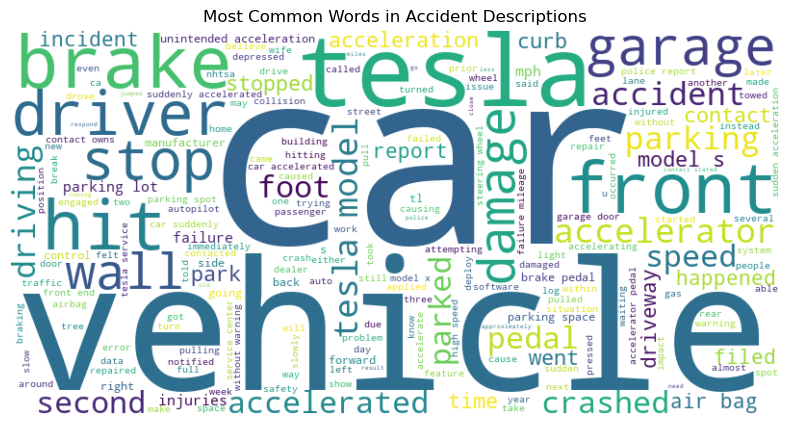

In [20]:

from wordcloud import WordCloud

# Combine all descriptions into one large text
text = " ".join(sudden_accln["Details"])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Accident Descriptions")
plt.show()


C:\Users\SAKSHI\AppData\Local\Temp\ipykernel_18344\1729686266.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_counts.index, y=model_counts.values, palette="magma")


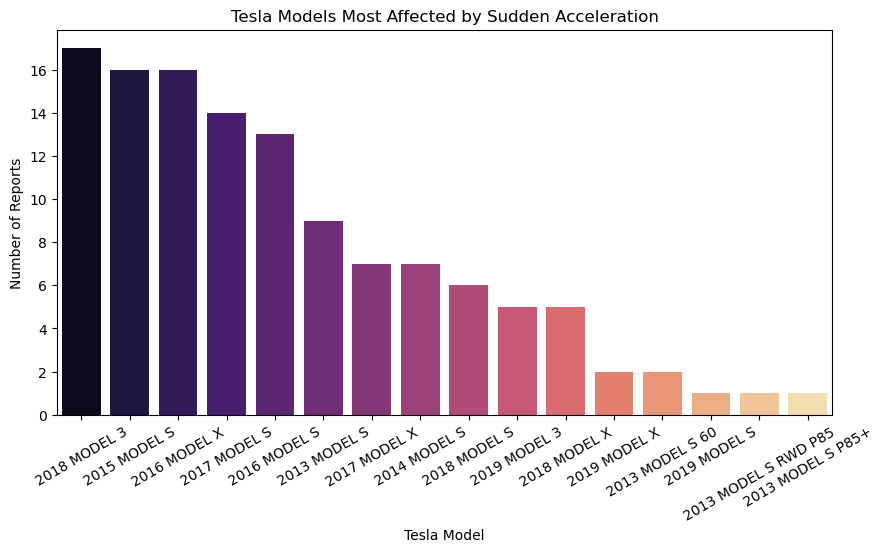

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count occurrences by model
model_counts = sudden_accln["Model"].value_counts()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=model_counts.index, y=model_counts.values, palette="magma")
plt.title("Tesla Models Most Affected by Sudden Acceleration")
plt.xlabel("Tesla Model")
plt.ylabel("Number of Reports")
plt.xticks(rotation=30)
plt.show()


In [26]:
sudden_accln.isnull().sum()

VIN                3
Model              0
Report Date        0
Incident Date      0
Location           0
NHTSA Complaint    0
Details            0
dtype: int64

C:\Users\SAKSHI\AppData\Local\Temp\ipykernel_18344\4222797681.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette="coolwarm")


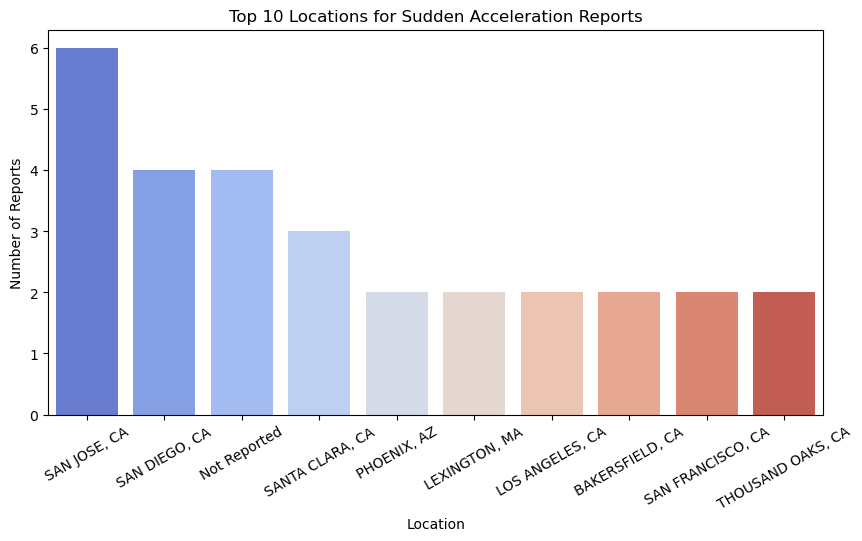

In [28]:
# Count occurrences by location
location_counts = sudden_accln["Location"].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=location_counts.index, y=location_counts.values, palette="coolwarm")
plt.title("Top 10 Locations for Sudden Acceleration Reports")
plt.xlabel("Location")
plt.ylabel("Number of Reports")
plt.xticks(rotation=30)
plt.show()


In [34]:
# Convert "Incident Date" and "Report Date" to datetime format
sudden_accln["Incident Date"] = pd.to_datetime(sudden_accln["Incident Date"], errors="coerce")
sudden_accln["Report Date"] = pd.to_datetime(sudden_accln["Report Date"], errors="coerce")

# Check if there are any remaining non-date values
print("Non-Date Values in Incident Date:", sudden_accln["Incident Date"].isna().sum())
print("Non-Date Values in Report Date:", sudden_accln["Report Date"].isna().sum())

# Display data type info
print(sudden_accln.dtypes)


Non-Date Values in Incident Date: 0
Non-Date Values in Report Date: 0
VIN                        object
Model                      object
Report Date        datetime64[ns]
Incident Date      datetime64[ns]
Location                   object
NHTSA Complaint             int64
Details                    object
dtype: object


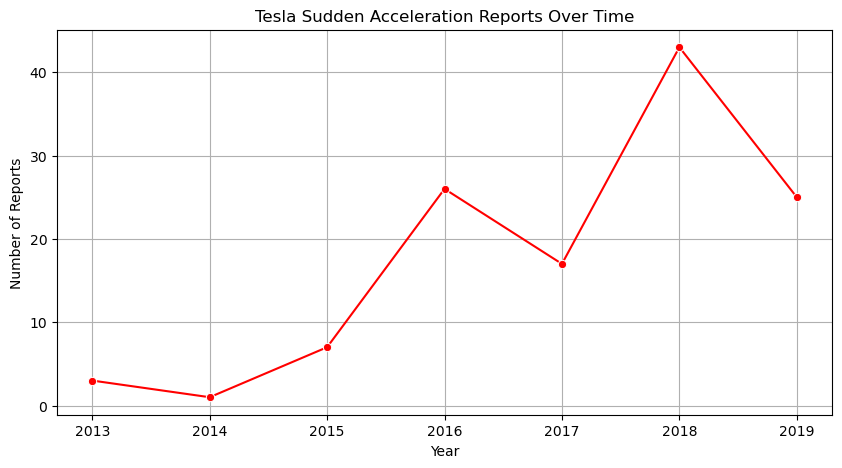

In [35]:
# Count incidents per year
incident_trend = sudden_accln["Incident Date"].dt.year.value_counts().sort_index()

# Plot trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=incident_trend.index, y=incident_trend.values, marker="o", color="red")
plt.title("Tesla Sudden Acceleration Reports Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Reports")
plt.grid()
plt.show()


C:\Users\SAKSHI\AppData\Local\Temp\ipykernel_18344\4255452683.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_counts.index, y=model_counts.values, palette="magma")


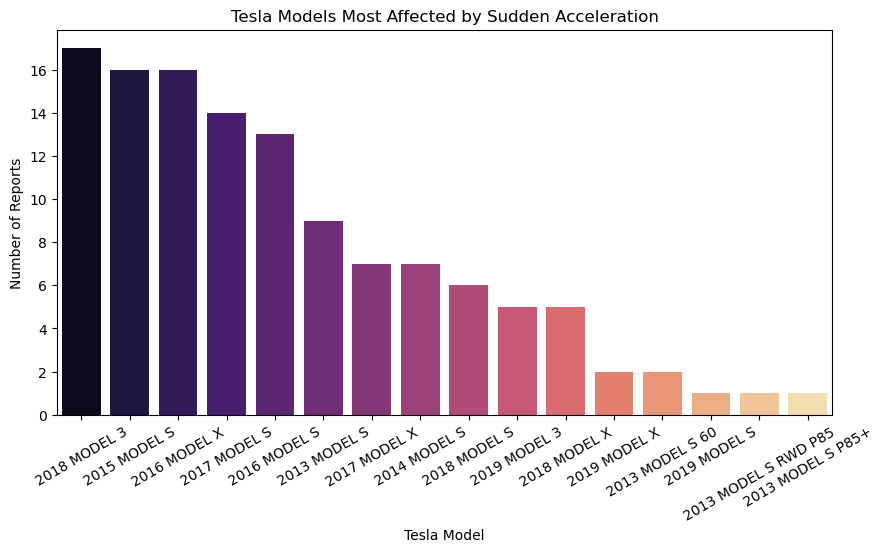

In [37]:
# Count occurrences by model
model_counts = sudden_accln["Model"].value_counts()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=model_counts.index, y=model_counts.values, palette="magma")
plt.title("Tesla Models Most Affected by Sudden Acceleration")
plt.xlabel("Tesla Model")
plt.ylabel("Number of Reports")
plt.xticks(rotation=30)
plt.show()


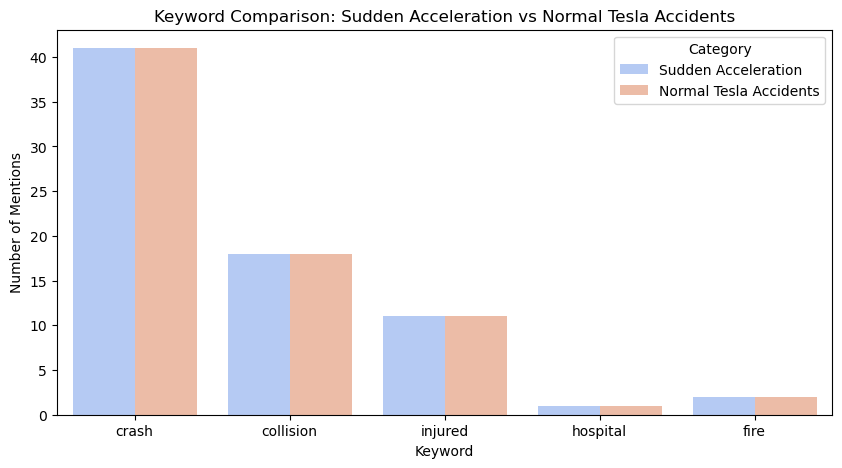

In [40]:
# Function to count keyword occurrences in "Details" column
def count_keyword(df, keyword):
    return sudden_accln["Details"].astype(str).str.contains(keyword, case=False, na=False).sum()

# Keywords to check
keywords = ["crash", "collision", "injured", "hospital", "fire"]

# Count occurrences in both datasets
sudden_counts = {kw: count_keyword(sudden_accln, kw) for kw in keywords}
normal_counts = {kw: count_keyword(tesla, kw) for kw in keywords}

# Convert to DataFrame for visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_compare = pd.DataFrame({"Keyword": keywords, 
                           "Sudden Acceleration": list(sudden_counts.values()), 
                           "Normal Tesla Accidents": list(normal_counts.values())})

# Melt for easier plotting
df_compare = df_compare.melt(id_vars="Keyword", var_name="Category", value_name="Count")

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x="Keyword", y="Count", hue="Category", data=df_compare, palette="coolwarm")
plt.title("Keyword Comparison: Sudden Acceleration vs Normal Tesla Accidents")
plt.xlabel("Keyword")
plt.ylabel("Number of Mentions")
plt.show()


C:\Users\SAKSHI\AppData\Local\Temp\ipykernel_18344\4139375230.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sudden_locations.index, y=sudden_locations.values, ax=ax[0], palette="magma")
C:\Users\SAKSHI\AppData\Local\Temp\ipykernel_18344\4139375230.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(sudden_locations.index, rotation=90)
C:\Users\SAKSHI\AppData\Local\Temp\ipykernel_18344\4139375230.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=normal_locations.index, y=normal_locations.values, ax=ax[1], palette="magma")


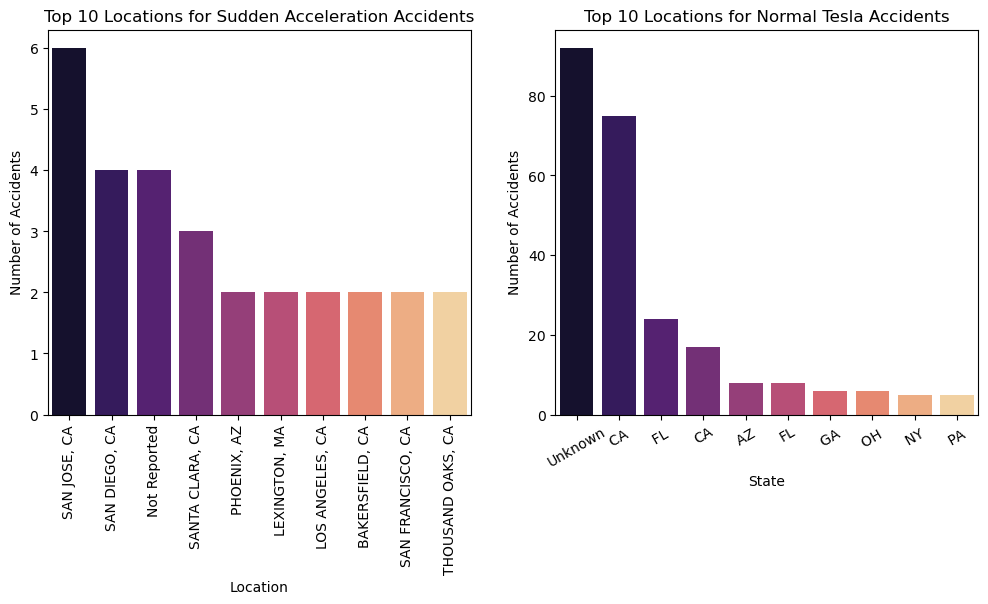

In [43]:
# Count top locations for each dataset
sudden_locations = sudden_accln["Location"].value_counts().head(10)
normal_locations = tesla["State"].value_counts().head(10)

# Plot side-by-side comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=sudden_locations.index, y=sudden_locations.values, ax=ax[0], palette="magma")
ax[0].set_title("Top 10 Locations for Sudden Acceleration Accidents")
ax[0].set_xlabel("Location")
ax[0].set_xticklabels(sudden_locations.index, rotation=90) 
ax[0].set_ylabel("Number of Accidents")

sns.barplot(x=normal_locations.index, y=normal_locations.values, ax=ax[1], palette="magma")
ax[1].set_title("Top 10 Locations for Normal Tesla Accidents")
ax[1].set_xlabel("State")
ax[1].set_ylabel("Number of Accidents")

plt.xticks(rotation=30)
plt.show()


In [45]:
sudden_accln.to_csv('sudden acceleration.csv')